<a href="https://colab.research.google.com/github/heddence/sign-lang/blob/master/lottery_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lottery Data**

## **Setup**

In [1]:
# Common imports
import numpy as np
import os

# Figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## **Load Data**

In [2]:
import pandas as pd

data = pd.read_csv('lottery_data.csv', parse_dates=['date'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             950 non-null    datetime64[ns]
 1   weekday          950 non-null    object        
 2   winning_numbers  950 non-null    object        
 3   powerball        950 non-null    int64         
 4   powerplay        950 non-null    int64         
 5   jackpot          950 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 44.7+ KB


In [4]:
data.head()

,date,weekday,winning_numbers,powerball,powerplay,jackpot
0,2014-05-07,Wed,17-29-31-48-49,34,2,70000000
1,2014-05-10,Sat,4-31-41-47-55,1,2,90000000
2,2014-05-14,Wed,7-33-39-52-55,33,3,90000000
3,2014-05-17,Sat,23-32-39-47-49,22,3,114000000
4,2014-05-21,Wed,4-20-34-39-58,31,5,114000000


## **EDA**

### 1. What were the most common powerball numbers depending on the day?

In [5]:
data['weekday'].unique()

array(['Wed', 'Sat', 'Mon'], dtype=object)

In [6]:
data['powerball'].unique()

array([34,  1, 33, 22, 31, 18, 25, 24, 15, 23, 30,  7, 26, 35,  9, 11, 14,
        3, 16, 29, 19, 27, 13, 28, 20, 12, 17, 10,  5,  8, 32,  6, 21,  2,
        4])

In [7]:
common_pb = data.groupby(['weekday', 'powerball']).size()
common_pb = common_pb.to_frame(name='size').reset_index()

mon_common_pb = common_pb[common_pb['weekday'] == 'Mon']\
  .sort_values(by='size', ascending=False)\
  .head(5)
wed_common_pb = common_pb[common_pb['weekday'] == 'Wed']\
  .sort_values(by='size', ascending=False)\
  .head(5)
sat_common_pb = common_pb[common_pb['weekday'] == 'Sat']\
  .sort_values(by='size', ascending=False)\
  .head(5)

Saving figure common_pb


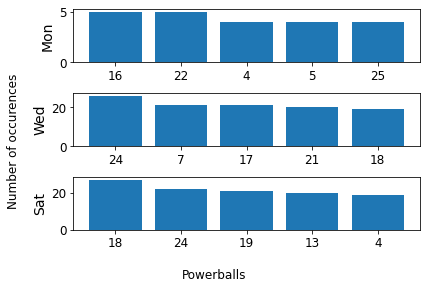

In [17]:
r = np.arange(len(mon_common_pb))

fig, axs = plt.subplots(3)
axs[0].bar(x=r, height=mon_common_pb['size'])
axs[1].bar(x=r, height=wed_common_pb['size'])
axs[2].bar(x=r, height=sat_common_pb['size'])

axs[0].set_xticks(r, mon_common_pb['powerball'])
axs[1].set_xticks(r, wed_common_pb['powerball'])
axs[2].set_xticks(r, sat_common_pb['powerball'])

axs[0].set_ylabel('Mon')
axs[1].set_ylabel('Wed')
axs[2].set_ylabel('Sat')

fig.supylabel('Number of occurences')
fig.supxlabel('Powerballs')

save_fig('common_pb')

### 2. What were the most common powerball numbers overall?

In [20]:
most_common_pb = data.groupby(['powerball']).size()

Saving figure most_common


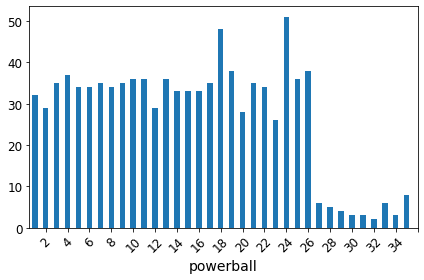

In [33]:
most_common_pb.plot.bar()
xr = np.array([x for x in most_common_pb.index if x % 2 != 0])
plt.xticks(xr, rotation=45)
save_fig('most_common_pb')

### 3. What were the most common powerplay numbers by day?

In [37]:
common_pp = data.groupby(['weekday', 'powerplay']).size()
common_pp = common_pp.to_frame(name='size').reset_index()

mon_common_pp = common_pp[common_pp['weekday'] == 'Mon']
sat_common_pp = common_pp[common_pp['weekday'] == 'Sat']
wed_common_pp = common_pp[common_pp['weekday'] == 'Wed']

Saving figure common_pp


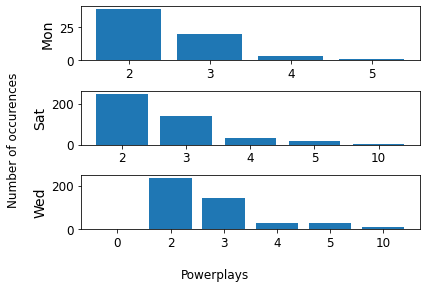

In [41]:
r1 = np.arange(len(mon_common_pp))
r2 = np.arange(len(sat_common_pp))
r3 = np.arange(len(wed_common_pp))

fig, axs = plt.subplots(3)

axs[0].bar(x=r1, height=mon_common_pp['size'])
axs[1].bar(x=r2, height=sat_common_pp['size'])
axs[2].bar(x=r3, height=wed_common_pp['size'])

axs[0].set_xticks(r1, mon_common_pp['powerplay'])
axs[1].set_xticks(r2, sat_common_pp['powerplay'])
axs[2].set_xticks(r3, wed_common_pp['powerplay'])

axs[0].set_ylabel('Mon')
axs[1].set_ylabel('Sat')
axs[2].set_ylabel('Wed')

fig.supylabel('Number of occurences')
fig.supxlabel('Powerplays')

save_fig('common_pp')

### 4. What were the most common powerplay numbers overall?

In [42]:
most_common_pp = data.groupby(['powerplay']).size()

Saving figure most_common_pp


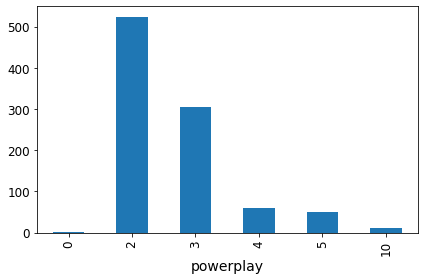

In [44]:
most_common_pp.plot.bar()
save_fig('most_common_pp')

### 5. Which day of the week had the highest median jackpot?

In [50]:
median_weekday = data.groupby(['weekday'])['jackpot'].median()

Saving figure median_jackpot


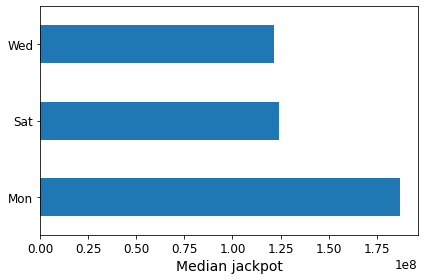

In [55]:
median_weekday.plot.barh()
plt.ylabel(None)
plt.xlabel('Median jackpot')
save_fig('median_jackpot')